In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from urllib.parse import urlencode

In [3]:
CH4_bySector_csv = os.path.join("GHG Emissions/CH4_bySector.csv")
N2O_bySector_csv = os.path.join("GHG Emissions/NO2_bySector.csv")
historical_emission_csv = os.path.join("GHG Emissions/historical_emission.csv")

CH4_bySector_df = pd.read_csv(CH4_bySector_csv)
N2O_bySector_df = pd.read_csv(N2O_bySector_csv)
historical_emission_df = pd.read_csv(historical_emission_csv)

In [4]:
wanted_columns = ['Country', 'Year', 'Agriculture', "Agriculture (per capita)"]
N2O_AG = N2O_bySector_df[wanted_columns]
CH4_AG = CH4_bySector_df[wanted_columns]

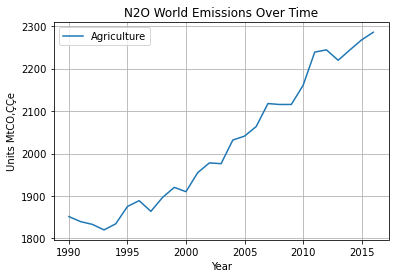

In [5]:
N2O_AG[N2O_AG['Country'] == "World"].plot.line("Year", "Agriculture")

plt.title('N2O World Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Units MtCO‚ÇÇe')
plt.grid()

plt.savefig('N2O World Emissions Over Time.png')

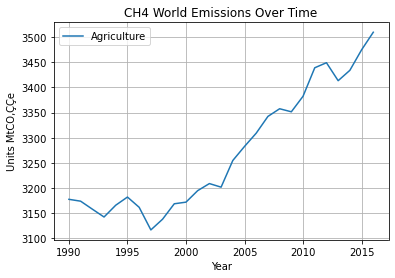

In [6]:
CH4_AG[CH4_AG['Country'] == "World"].plot.line("Year", "Agriculture")

plt.title('CH4 World Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Units MtCO‚ÇÇe')
plt.grid()

plt.savefig('CH4 World Emissions Over Time.png')

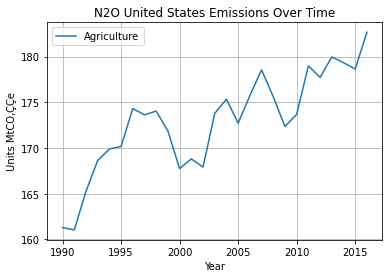

In [7]:
N2O_AG[N2O_AG['Country'] == "United States"].plot.line("Year", "Agriculture")

plt.title('N2O United States Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Units MtCO‚ÇÇe')
plt.grid()

plt.savefig('N2O United States Emissions Over Time.png')

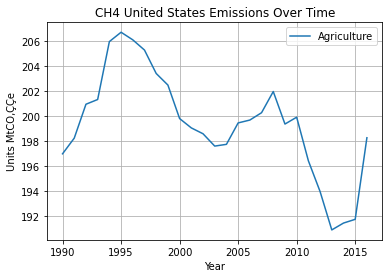

In [8]:
CH4_AG[CH4_AG['Country'] == "United States"].plot.line("Year", "Agriculture")

plt.title('CH4 United States Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Units MtCO‚ÇÇe')
plt.grid()

plt.savefig('CH4 United States Emissions Over Time.png')

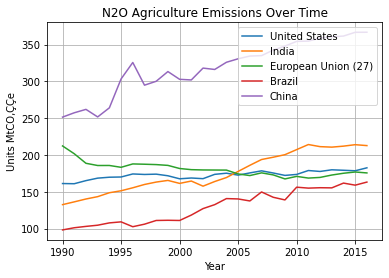

In [18]:
fig = ax.get_figure()

x1 = N2O_AG[N2O_AG['Country'] == "United States"]["Year"]
y1 = N2O_AG[N2O_AG['Country'] == "United States"]["Agriculture"]

x2 = N2O_AG[N2O_AG['Country'] == "India"]["Year"]
y2 = N2O_AG[N2O_AG['Country'] == "India"]["Agriculture"]

x3 = N2O_AG[N2O_AG['Country'] == "European Union (27)"]["Year"]
y3 = N2O_AG[N2O_AG['Country'] == "European Union (27)"]["Agriculture"]

x4 = N2O_AG[N2O_AG['Country'] == "Brazil"]["Year"]
y4 = N2O_AG[N2O_AG['Country'] == "Brazil"]["Agriculture"]

x5 = N2O_AG[N2O_AG['Country'] == "China"]["Year"]
y5 = N2O_AG[N2O_AG['Country'] == "China"]["Agriculture"]

fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(x1,y1,label='United States')
ax.plot(x2,y2,label='India')
ax.plot(x3,y3,label='European Union (27)')
ax.plot(x4,y4,label='Brazil')
ax.plot(x5,y5,label='China')

plt.title('N2O Agriculture Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Units MtCO‚ÇÇe')

plt.legend(loc=1)
plt.grid()

fig.savefig("N2O Agriculture Emissions Over Time Top5.png")

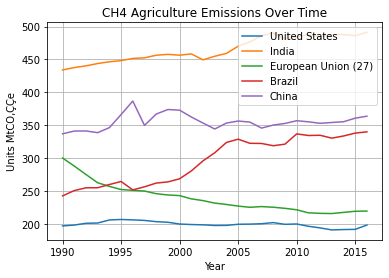

In [15]:
x1 = CH4_AG[CH4_AG['Country'] == "United States"]["Year"]
y1 = CH4_AG[CH4_AG['Country'] == "United States"]["Agriculture"]

x2 = CH4_AG[CH4_AG['Country'] == "India"]["Year"]
y2 = CH4_AG[CH4_AG['Country'] == "India"]["Agriculture"]

x3 = CH4_AG[CH4_AG['Country'] == "European Union (27)"]["Year"]
y3 = CH4_AG[CH4_AG['Country'] == "European Union (27)"]["Agriculture"]

x4 = CH4_AG[CH4_AG['Country'] == "Brazil"]["Year"]
y4 = CH4_AG[CH4_AG['Country'] == "Brazil"]["Agriculture"]

x5 = CH4_AG[CH4_AG['Country'] == "China"]["Year"]
y5 = CH4_AG[CH4_AG['Country'] == "China"]["Agriculture"]

fig=plt.figure()
ax=fig.add_subplot(111)
 
ax.plot(x1,y1,label='United States')
ax.plot(x2,y2,label='India')
ax.plot(x3,y3,label='European Union (27)')
ax.plot(x4,y4,label='Brazil')
ax.plot(x5,y5,label='China')

plt.title('CH4 Agriculture Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Units MtCO‚ÇÇe')

plt.legend(loc=1)
plt.grid()

plt.savefig('CH4 Agriculutre Emissions Over Time Top5.png')

In [19]:
historical_emission_yearly = historical_emission_df.melt(id_vars = ['Country', 'Sector', 'Gas'], value_vars = historical_emission_df.columns[6:], var_name = "Year", value_name = "All GHG Emission Units")
historical_emission_yearly = historical_emission_yearly[historical_emission_yearly['Gas'] == 'All GHG']
historical_emission_yearly = historical_emission_yearly.drop(columns = "Gas")
historical_emission_yearly = historical_emission_yearly[~historical_emission_yearly["Sector"].isin(["Total excluding LUCF", "Total including LUCF"])]

historical_emission_yearly = historical_emission_yearly.sort_values(by = "Year", ascending = True)

historical_emission_yearly_world = historical_emission_yearly[historical_emission_yearly['Country'] == "World"]
historical_emission_yearly_USA = historical_emission_yearly[historical_emission_yearly['Country'] == "United States"]

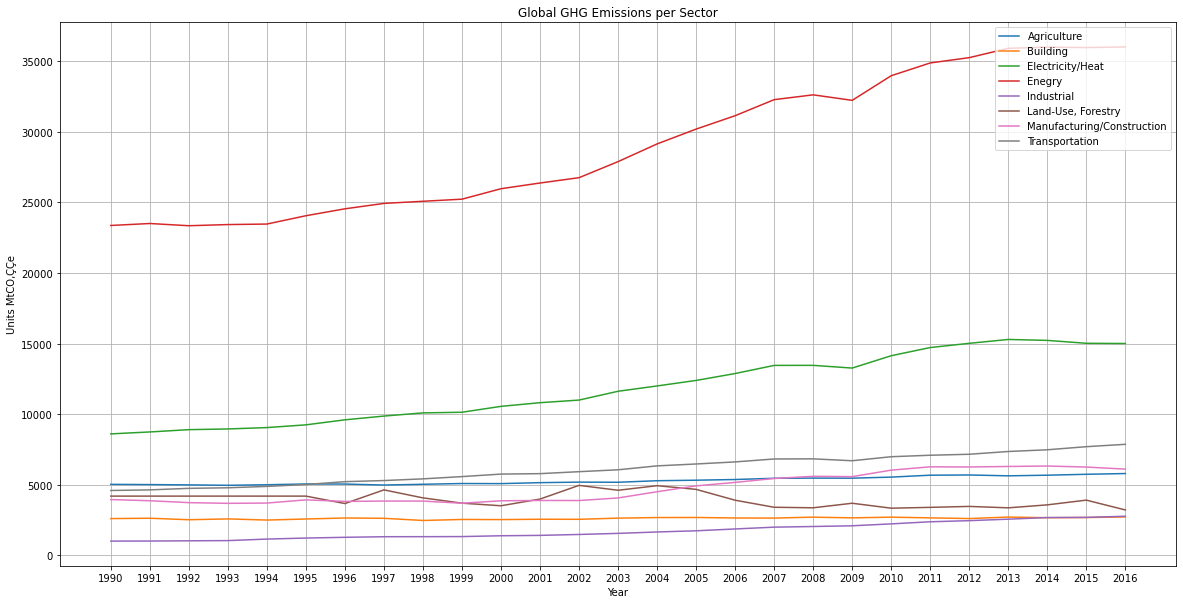

In [24]:
x1 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Agriculture"]["Year"]
y1 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Agriculture"]["All GHG Emission Units"]

x2 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Building"]["Year"]
y2 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Building"]["All GHG Emission Units"]

# x3 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Bunker Fuels"]["Year"]
# y3 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Bunker Fuels"]["All GHG Emission Units"]

x4 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Electricity/Heat"]["Year"]
y4 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Electricity/Heat"]["All GHG Emission Units"]

x5 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Energy"]["Year"]
y5 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Energy"]["All GHG Emission Units"]

# x6 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Fugitive Emissions"]["Year"]
# y6 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Fugitive Emissions"]["All GHG Emission Units"]

x7 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Industrial Processes"]["Year"]
y7 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Industrial Processes"]["All GHG Emission Units"]

x8 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Land-Use Change and Forestry"]["Year"]
y8 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Land-Use Change and Forestry"]["All GHG Emission Units"]

x9 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Manufacturing/Construction"]["Year"]
y9 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Manufacturing/Construction"]["All GHG Emission Units"]

# x10 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Other Fuel Combustion"]["Year"]
# y10 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Other Fuel Combustion"]["All GHG Emission Units"]

x11 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Transportation"]["Year"]
y11 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Transportation"]["All GHG Emission Units"]

# x12 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Waste"]["Year"]
# y12 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Waste"]["All GHG Emission Units"]


fig=plt.figure(figsize = [20,10])
ax=fig.add_subplot(111)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')
# ax.plot(x3,y3,label='Bunker Fuels')
ax.plot(x4,y4,label='Electricity/Heat')
ax.plot(x5,y5,label='Enegry')
# ax.plot(x6,y6,label='Fugitive Emissions')
ax.plot(x7,y7,label='Industrial')
ax.plot(x8,y8,label='Land-Use, Forestry')
ax.plot(x9,y9,label='Manufacturing/Construction')
# ax.plot(x10,y10,label='Other Fuel Combustion')
ax.plot(x11,y11,label='Transportation')
# ax.plot(x12,y12,label='Waste')

plt.title('Global GHG Emissions per Sector')
plt.xlabel('Year')
plt.ylabel('Units MtCO‚ÇÇe')

plt.legend(loc=1)
plt.grid()

plt.savefig('Global GHG Emissions per Sector.png')

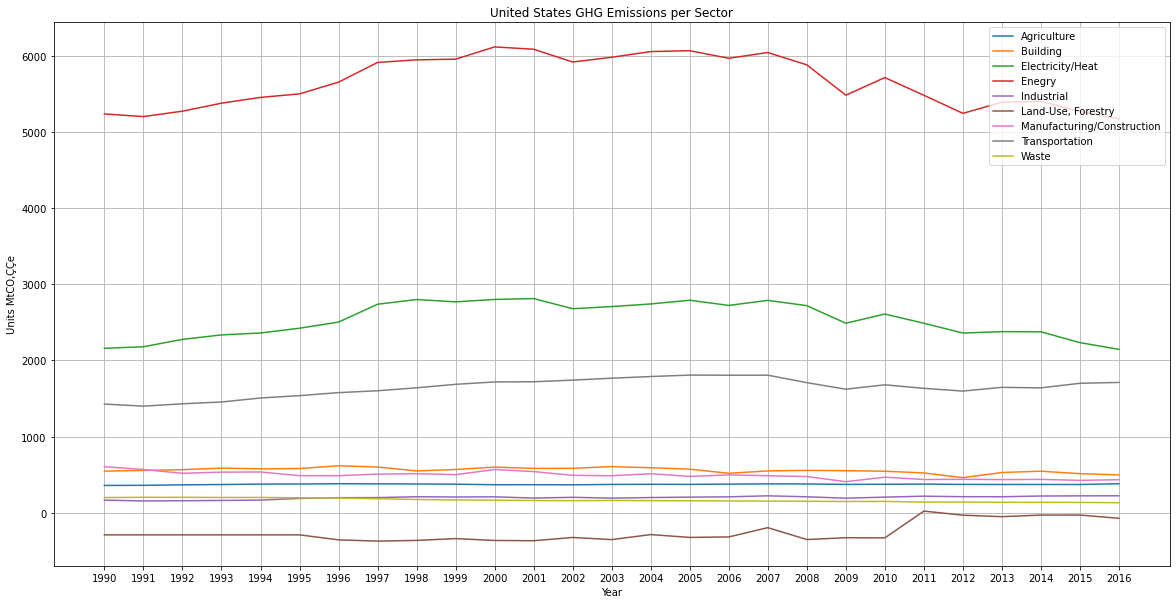

In [22]:
x1 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Agriculture"]["Year"]
y1 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Agriculture"]["All GHG Emission Units"]

x2 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Building"]["Year"]
y2 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Building"]["All GHG Emission Units"]

# x3 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Bunker Fuels"]["Year"]
# y3 = historical_emission_yearly_world[historical_emission_yearly_world["Sector"] == "Bunker Fuels"]["All GHG Emission Units"]

x4 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Electricity/Heat"]["Year"]
y4 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Electricity/Heat"]["All GHG Emission Units"]

x5 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Energy"]["Year"]
y5 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Energy"]["All GHG Emission Units"]

# x6 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Fugitive Emissions"]["Year"]
# y6 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Fugitive Emissions"]["All GHG Emission Units"]

x7 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Industrial Processes"]["Year"]
y7 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Industrial Processes"]["All GHG Emission Units"]

x8 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Land-Use Change and Forestry"]["Year"]
y8 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Land-Use Change and Forestry"]["All GHG Emission Units"]

x9 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Manufacturing/Construction"]["Year"]
y9 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Manufacturing/Construction"]["All GHG Emission Units"]

# x10 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Other Fuel Combustion"]["Year"]
# y10 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Other Fuel Combustion"]["All GHG Emission Units"]

x11 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Transportation"]["Year"]
y11 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Transportation"]["All GHG Emission Units"]

# x12 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Waste"]["Year"]
# y12 = historical_emission_yearly_USA[historical_emission_yearly_USA["Sector"] == "Waste"]["All GHG Emission Units"]


fig=plt.figure(figsize = [20,10])
ax=fig.add_subplot(111)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')
# ax.plot(x3,y3,label='Bunker Fuels')
ax.plot(x4,y4,label='Electricity/Heat')
ax.plot(x5,y5,label='Enegry')
# ax.plot(x6,y6,label='Fugitive Emissions')
ax.plot(x7,y7,label='Industrial')
ax.plot(x8,y8,label='Land-Use, Forestry')
ax.plot(x9,y9,label='Manufacturing/Construction')
# ax.plot(x10,y10,label='Other Fuel Combustion')
ax.plot(x11,y11,label='Transportation')
# ax.plot(x12,y12,label='Waste')

plt.title('United States GHG Emissions per Sector')
plt.xlabel('Year')
plt.ylabel('Units MtCO‚ÇÇe')

plt.legend(loc=1)
plt.grid()

plt.savefig('United States GHG Emissions per Sector.png')

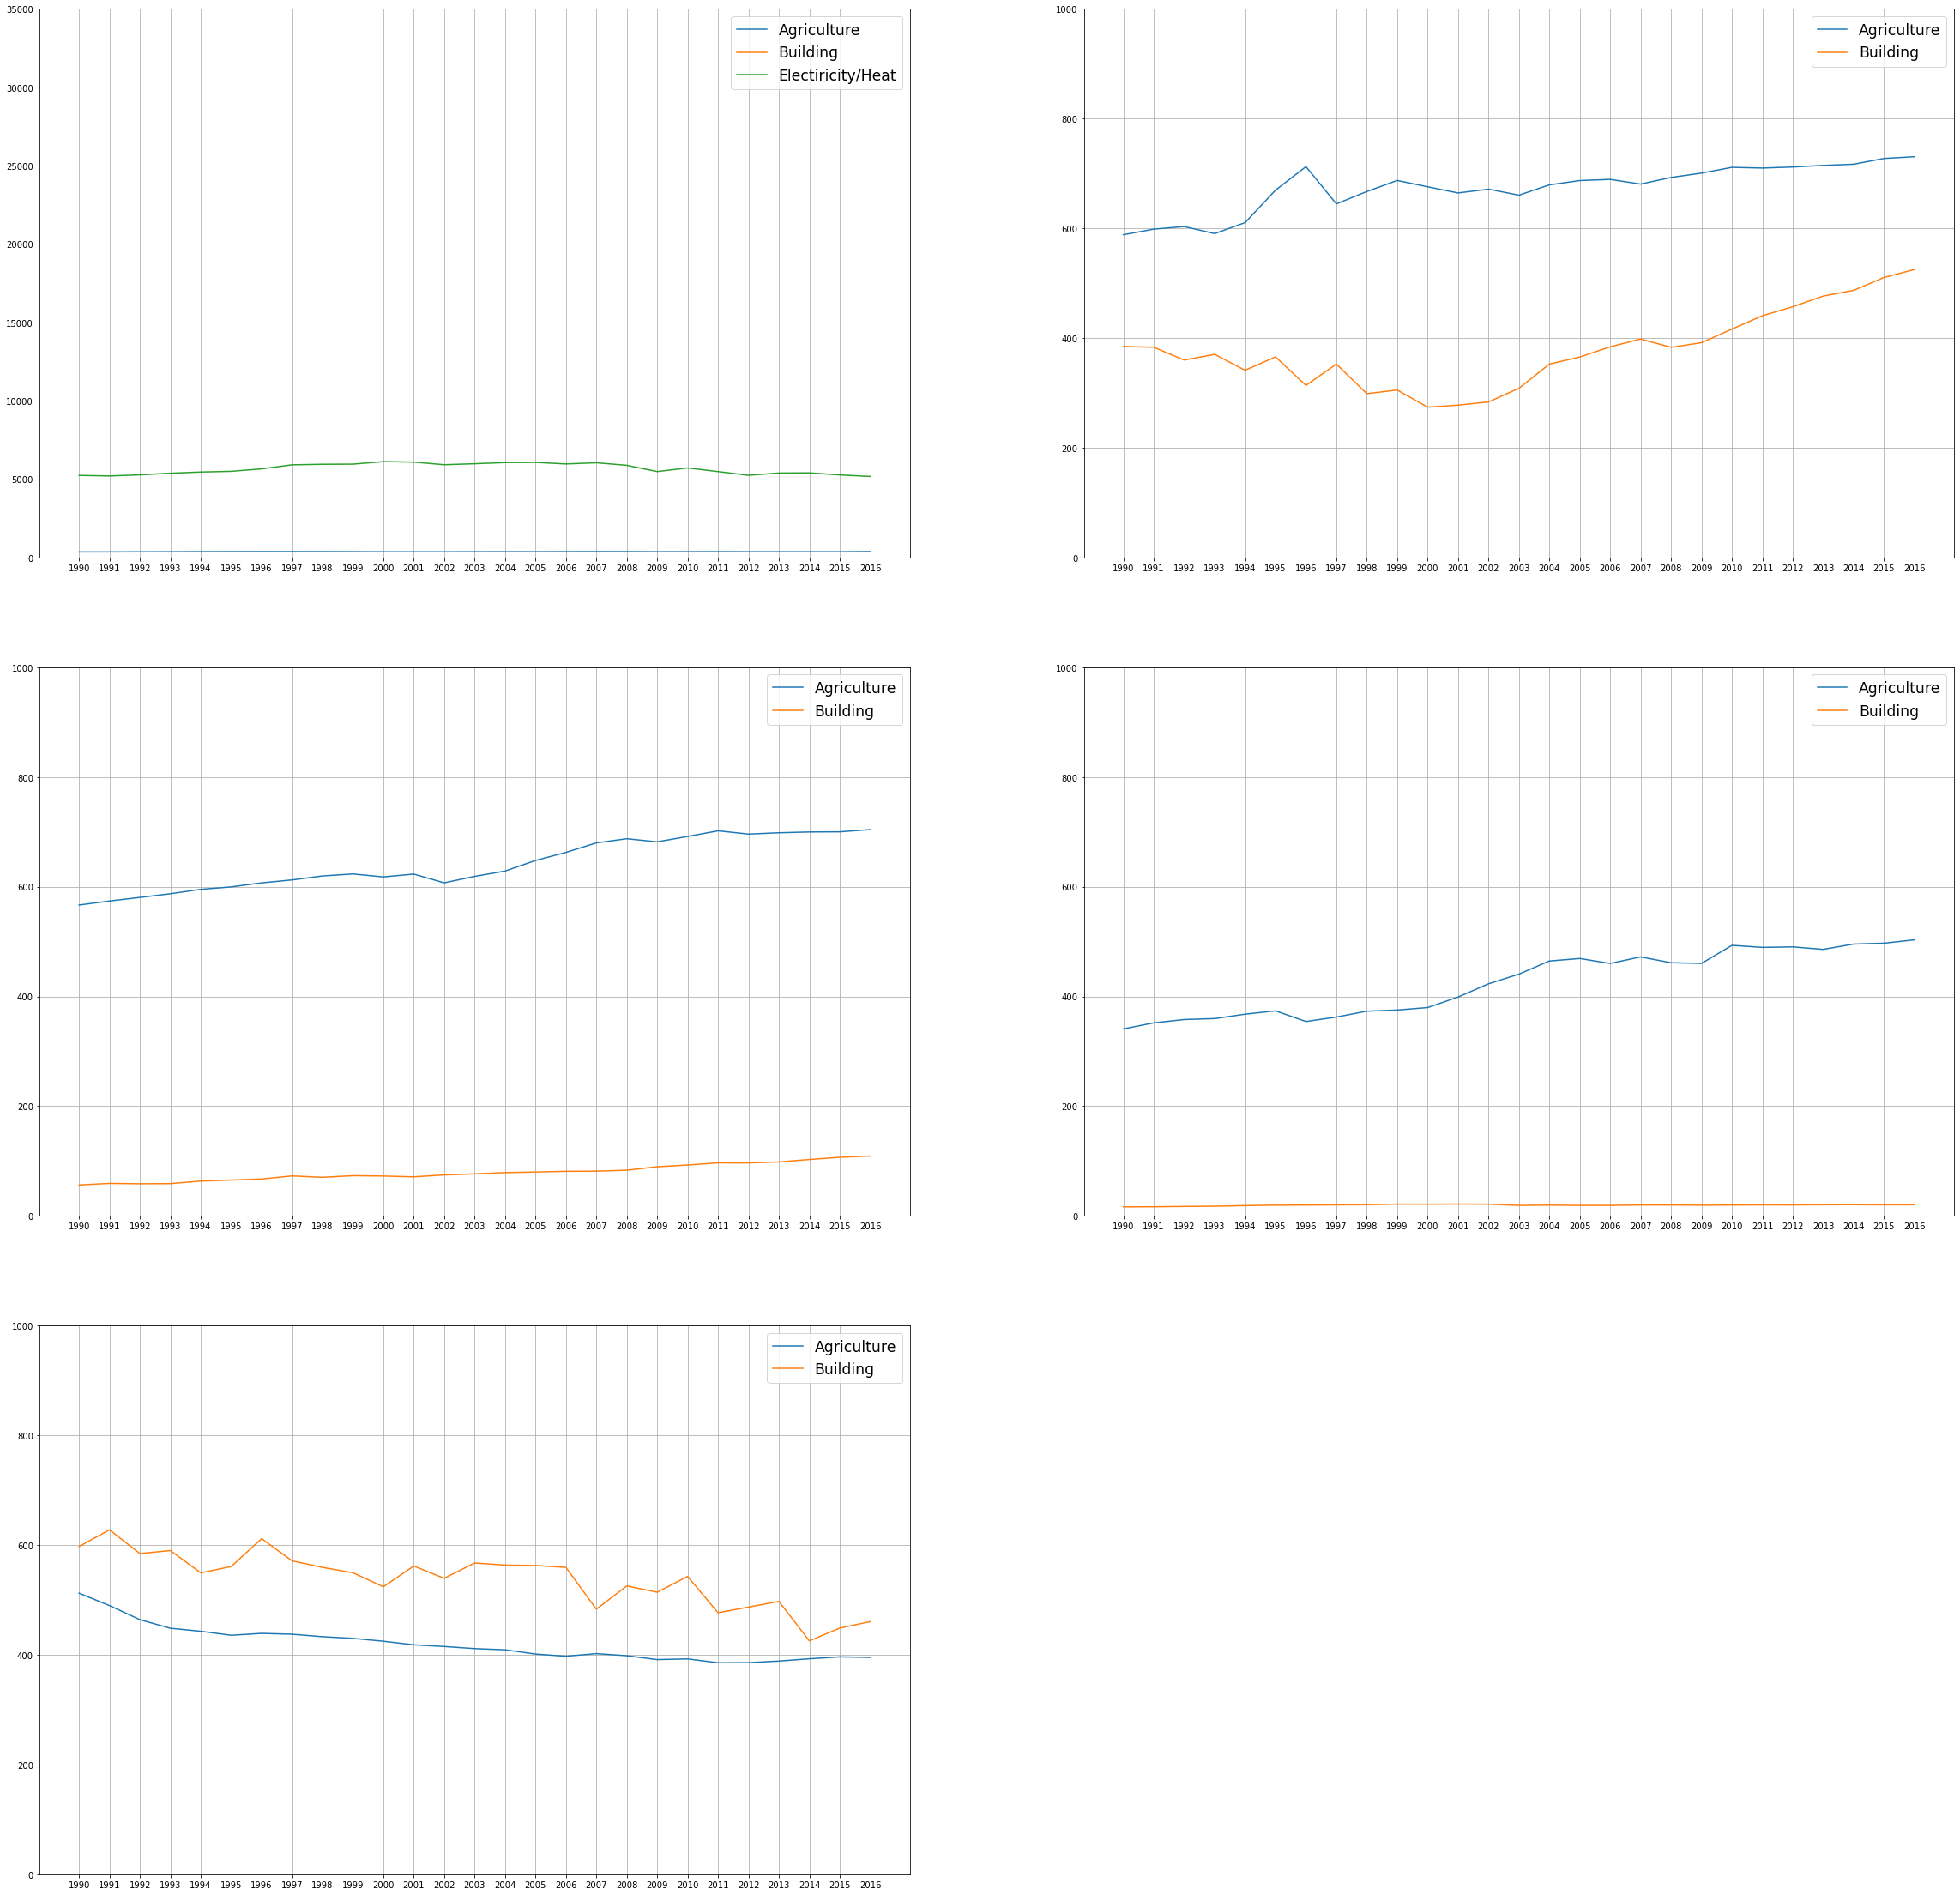

In [60]:
fig=plt.figure(figsize = [40, 40])

x1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "United States") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["Year"]
y1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "United States") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "United States") & (historical_emission_yearly_top5["Sector"] == "Energy")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "United States") & (historical_emission_yearly_top5["Sector"] == "Energy")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "United States") & (historical_emission_yearly_top5["Sector"] == "Electiricty/Heat")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "United States") & (historical_emission_yearly_top5["Sector"] == "Electiricty/Heat")]["All GHG Emission Units"]


ax=fig.add_subplot(321)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')
ax.plot(x3,y3,label='Electiricity/Heat')

ax.legend(loc='best', fontsize = 'xx-large')
ax.set_ybound(0,35000)
ax.grid()

x1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "China") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["Year"]
y1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "China") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "China") & (historical_emission_yearly_top5["Sector"] == "Building")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "China") & (historical_emission_yearly_top5["Sector"] == "Building")]["All GHG Emission Units"]

ax=fig.add_subplot(322)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')

ax.legend(loc='best', fontsize = 'xx-large')
ax.set_ybound(0,1000)
ax.grid()

x1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "India") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["Year"]
y1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "India") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "India") & (historical_emission_yearly_top5["Sector"] == "Building")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "India") & (historical_emission_yearly_top5["Sector"] == "Building")]["All GHG Emission Units"]

ax=fig.add_subplot(323)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')

ax.legend(loc='best', fontsize = 'xx-large')
ax.set_ybound(0,1000)
ax.grid()

x1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "Brazil") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["Year"]
y1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "Brazil") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "Brazil") & (historical_emission_yearly_top5["Sector"] == "Building")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "Brazil") & (historical_emission_yearly_top5["Sector"] == "Building")]["All GHG Emission Units"]

ax=fig.add_subplot(324)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')

ax.legend(loc='best', fontsize = 'xx-large')
ax.set_ybound(0,1000)
ax.grid()

x1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "European Union (27)") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["Year"]
y1 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "European Union (27)") & (historical_emission_yearly_top5["Sector"] == "Agriculture")]["All GHG Emission Units"]

x2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "European Union (27)") & (historical_emission_yearly_top5["Sector"] == "Building")]["Year"]
y2 = historical_emission_yearly_top5[(historical_emission_yearly_top5["Country"] == "European Union (27)") & (historical_emission_yearly_top5["Sector"] == "Building")]["All GHG Emission Units"]

ax=fig.add_subplot(325)
 
ax.plot(x1,y1,label='Agriculture')
ax.plot(x2,y2,label='Building')

ax.legend(loc='best', fontsize = 'xx-large')
ax.set_ybound(0,1000)
ax.grid()